In [2]:
import pandas as pd
data=pd.read_csv("/content/WHO COVID-19 cases (1).csv")
print(data)

      Date_reported Country_code      Country Continent WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan      Asia       EMRO        NaN   
1        2020-01-12           AF  Afghanistan      Asia       EMRO        NaN   
2        2020-01-19           AF  Afghanistan      Asia       EMRO        NaN   
3        2020-01-26           AF  Afghanistan      Asia       EMRO        NaN   
4        2020-02-02           AF  Afghanistan      Asia       EMRO        NaN   
...             ...          ...          ...       ...        ...        ...   
58555    2024-08-04           ZW     Zimbabwe    Africa       AFRO        1.0   
58556    2024-08-11           ZW     Zimbabwe    Africa       AFRO        NaN   
58557    2024-08-18           ZW     Zimbabwe    Africa       AFRO        NaN   
58558    2024-08-25           ZW     Zimbabwe    Africa       AFRO        NaN   
58559    2024-09-01           ZW     Zimbabwe    Africa       AFRO        NaN   

       Cumulative_cases  Ne

In [3]:
data.isna().sum()

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64

In [4]:
data["Country_code"]=data["Country_code"].fillna("0")
data["WHO_region"]=data["WHO_region"].fillna("0")
data["New_cases"]=data["New_cases"].fillna(0)
data["New_deaths"]=data["New_deaths"].fillna(0)
print(data)

      Date_reported Country_code      Country Continent WHO_region  New_cases  \
0        2020-01-05           AF  Afghanistan      Asia       EMRO        0.0   
1        2020-01-12           AF  Afghanistan      Asia       EMRO        0.0   
2        2020-01-19           AF  Afghanistan      Asia       EMRO        0.0   
3        2020-01-26           AF  Afghanistan      Asia       EMRO        0.0   
4        2020-02-02           AF  Afghanistan      Asia       EMRO        0.0   
...             ...          ...          ...       ...        ...        ...   
58555    2024-08-04           ZW     Zimbabwe    Africa       AFRO        1.0   
58556    2024-08-11           ZW     Zimbabwe    Africa       AFRO        0.0   
58557    2024-08-18           ZW     Zimbabwe    Africa       AFRO        0.0   
58558    2024-08-25           ZW     Zimbabwe    Africa       AFRO        0.0   
58559    2024-09-01           ZW     Zimbabwe    Africa       AFRO        0.0   

       Cumulative_cases  Ne

In [5]:
from sklearn.preprocessing import LabelEncoder
b=LabelEncoder()
data["Country"]=b.fit_transform(data["Country"])
data["WHO_region"]=b.fit_transform(data["WHO_region"])
data["Country_code"]=b.fit_transform(data["Country_code"])
data["Continent"]=b.fit_transform(data["Continent"])
data["Date_reported"]=pd.to_datetime(data["Date_reported"])
data["Date_reported"]=b.fit_transform(data["Date_reported"])
print(data)

       Date_reported  Country_code  Country  Continent  WHO_region  New_cases  \
0                  0             3        0          1           3        0.0   
1                  1             3        0          1           3        0.0   
2                  2             3        0          1           3        0.0   
3                  3             3        0          1           3        0.0   
4                  4             3        0          1           3        0.0   
...              ...           ...      ...        ...         ...        ...   
58555            239           239      238          0           1        1.0   
58556            240           239      238          0           1        0.0   
58557            241           239      238          0           1        0.0   
58558            242           239      238          0           1        0.0   
58559            243           239      238          0           1        0.0   

       Cumulative_cases  Ne

In [7]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.02)
print(xtrain)
print(ytrain)

       Date_reported  Country_code  Country  Continent  WHO_region  New_cases  \
25784            164            97      105          1           3        0.0   
35719             95           127      146          0           3     1884.0   
14978             94            60       61          0           3     6148.0   
25233            101           231      103          6           5        0.0   
44805            153           186      182          7           0        0.0   
...              ...           ...      ...        ...         ...        ...   
9598              82            37       39          0           1       28.0   
50607             99           183      206          0           3     1032.0   
3907               3            17       16          1           6        0.0   
18017            205            74       73          3           0        0.0   
32966             26           133      135          4           7        0.0   

       Cumulative_cases  Ne

In [9]:
from sklearn.linear_model import LinearRegression
br=LinearRegression()
br.fit(xtrain,ytrain)
ypred=br.predict(xtest)

In [10]:
c=br.predict([[244,0,0,0,0,600,5029,346]])
print(c)

[10614.41169609]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[5.5255e+04, 1.0400e+03, 1.7500e+02, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.3500e+02, 1.5800e+02, 2.5000e+01, 3.7000e+01, 1.1000e+01,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [5.3000e+01, 2.7700e+02, 5.0000e+00, 1.1200e+02, 1.5000e+01,
         3.4000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5800e+02, 2.2200e+02, 0.0000e+00, 2.3000e+01, 1.6000e+01,
         1.3000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.3500e+02,
         4.0000e+00, 1.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000

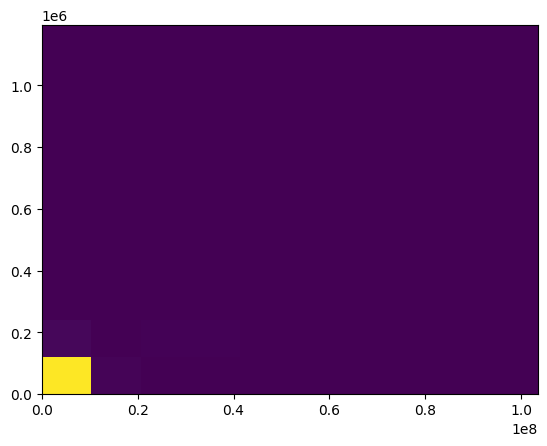

In [11]:
from matplotlib import pyplot as plt
plt.hist2d(data["Cumulative_cases"],data["Cumulative_deaths"])
